In [50]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# loading the dataset

crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [52]:
crop_data.shape

#rows X columns

(2200, 8)

In [53]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [54]:
# dataset columns
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [55]:
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [56]:
# statistical inference of the dataset

crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [57]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [58]:
# Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [59]:
#checking
crop_data.isnull().values.any()


False

In [60]:
crop_data.Crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [61]:
# get top 5 most frequent growing crops
n = 5
crop_data['Crop'].value_counts()[:5].index.tolist()

['rice', 'maize', 'jute', 'cotton', 'coconut']

In [62]:
crop_data.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16752\2551321222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crop_data.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16752\2621403898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_data.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

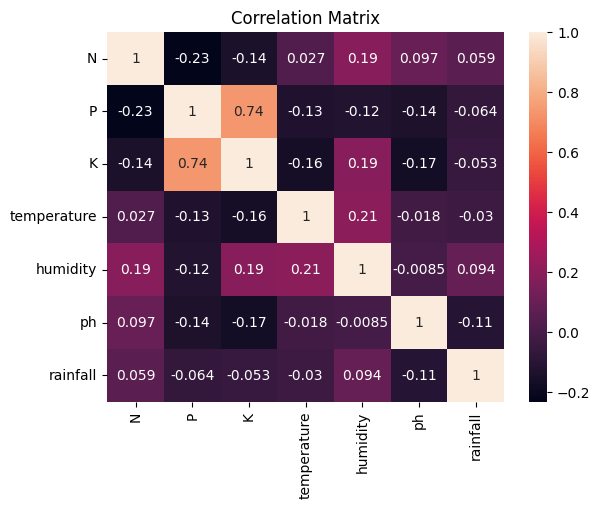

In [63]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [64]:
# Shuffling data to remove order effects

# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


In [65]:
# Selection of Feature and Target variables.

x = df[['N', 'P','K','temperature', 'ph', 'rainfall']]
target = df['Crop']

In [66]:
# Encoding target variable 

y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1832,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [67]:
# Splitting data set - 25% test dataset and 75% 


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 6)
x_test : (550, 6)
y_train : (1650, 22)
y_test : (550, 22)


In [68]:
x_test

,N,P,K,temperature,ph,rainfall
486,39,77,21,22.997744,4.603563,159.689339
42,83,60,36,25.597049,6.903986,200.834898
1916,135,43,16,23.479869,6.720450,86.762879
1496,82,26,47,28.504164,6.565313,24.200072
1482,117,25,54,28.682760,6.150686,29.111877
...,...,...,...,...,...,...
1126,38,19,31,34.738239,5.855119,90.650222
305,26,65,22,17.848066,5.949949,143.098417
1498,90,15,52,27.049275,6.448062,23.657475
55,75,38,39,23.446768,6.215110,283.933847


In [69]:
# Importing necessary libraries for multi-output classification

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [70]:
# Training

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train.values, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [71]:
# Predicting test results 

forest_pred = multi_target_forest.predict(x_test.values)
forest_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [72]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.9381818181818182


<b> Cross-validation </b>

In [73]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.92121212, 0.91818182, 0.91212121, 0.93333333, 0.94242424])

In [74]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

92.55

In [75]:
c1 = (score.std()*100)
c1

1.0942709142586522

In [76]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 92.55%
Standard Deviation : 1.09%


In [77]:
# Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [78]:
# Predicting test results 

decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [79]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.9018181818181819


0.9018181818181819

<b> Cross-validation </b>  

In [80]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.86440678, 0.91525424, 0.90254237, 0.92372881, 0.91101695,
       0.93191489, 0.90212766])

In [81]:
b2 = "{:.2f}".format(score.mean()*100)
b2 = float(b2)
b2

90.73

In [82]:
c2 = (score.std()*100)
c2

2.0149793694550713

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train.values, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [84]:
knn_pred = model.predict(x_test.values)
knn_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [85]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test,knn_pred)
print('Accuracy score:', accuracy_score(y_test,knn_pred))
a3

Accuracy score: 0.9018181818181819


0.9018181818181819

<b> Cross validation </b>

In [86]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X = x_train, y = y_train,cv=7)
score

array([0.91101695, 0.91949153, 0.88983051, 0.88559322, 0.86864407,
       0.92340426, 0.94468085])

In [87]:
b3 = "{:.2f}".format(score.mean()*100)
b3 = float(b3)
b3

90.61

In [88]:
c3 = (score.std()*100)
c3

2.4141250038028175

In [89]:
import pandas as pd
 
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'KNN Classifier'],
        'Accuracy':[b1, b2, b3],
        'Standard Deviation':[c1,c2,c3]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data)
 
# print the data
df

,Algorithms,Accuracy,Standard Deviation
0,Random Forest,92.55,1.094271
1,Decision-tree,90.73,2.014979
2,KNN Classifier,90.61,2.414125


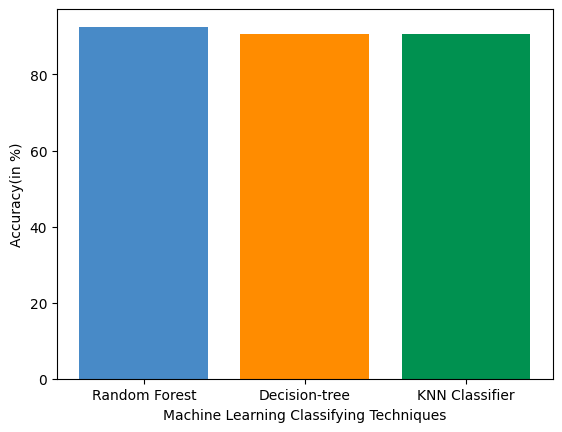

In [90]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN Classifier']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

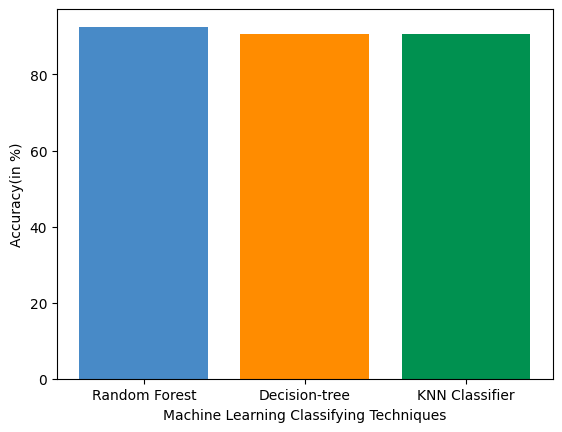

In [91]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN Classifier']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

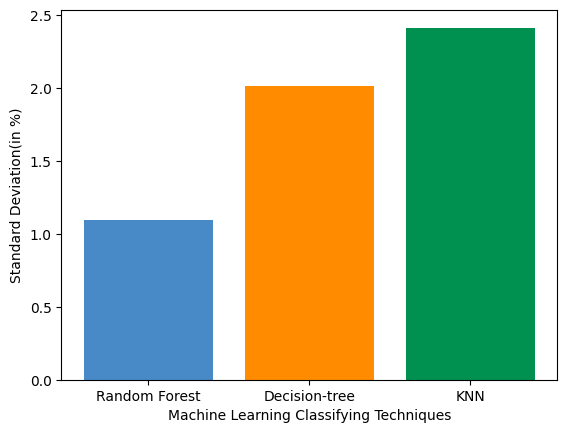

In [92]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN']
Accuracy = [c1, c2, c3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color= ['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show()

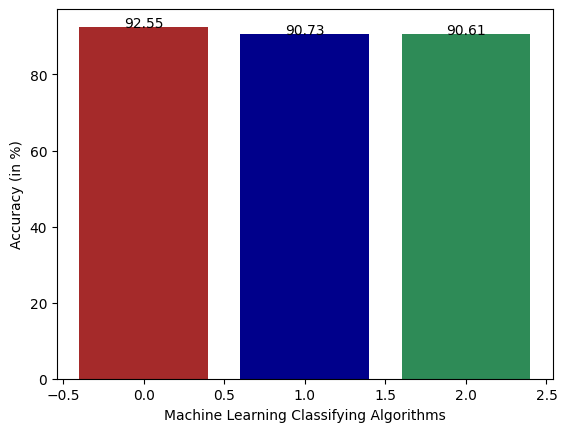

In [93]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Random Forest", "Decision tree", "KNN"]
    y = [b1,b2,b3]


    x_pos = np.arange(len(y))

    # Create bars with different colors
    plt.bar(x_pos, y, color= ['#A52A2A','#00008B','#2E8B57'])
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Machine Learning Classifying Algorithms")
    plt.ylabel("Accuracy (in %)")
      
    # visualizing the plot
    plt.show()

In [94]:
"""#bff1f1
#fadadd
#ddfada
sourajita dewasi9:47 PM
#e7dafa
#bb97f1"""

'#bff1f1\n#fadadd\n#ddfada\nsourajita dewasi9:47 PM\n#e7dafa\n#bb97f1'

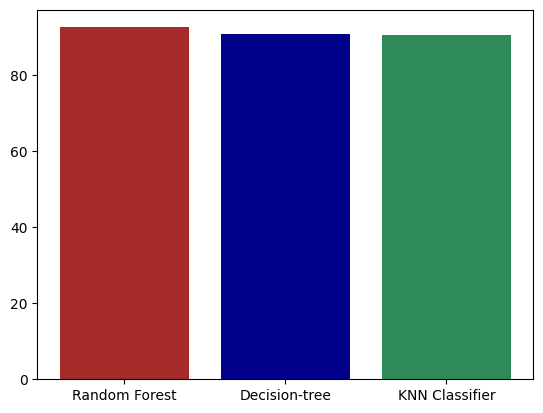

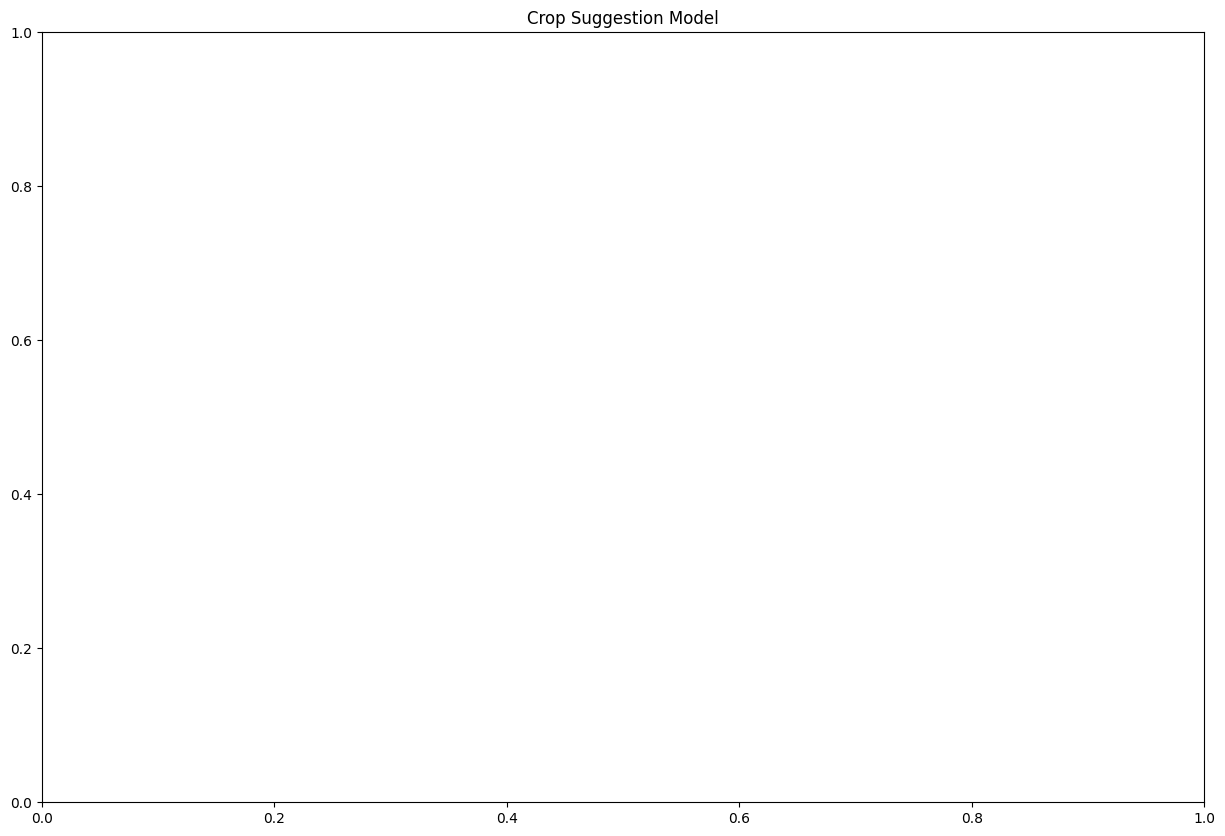

In [95]:
plt.bar(df['Algorithms'], df['Accuracy'], color = ['#A52A2A','#00008B','#2E8B57'])
fig = plt.figure(figsize =(15, 10))
plt.title('Crop Suggestion Model')
 
# Show Plot
plt.show()

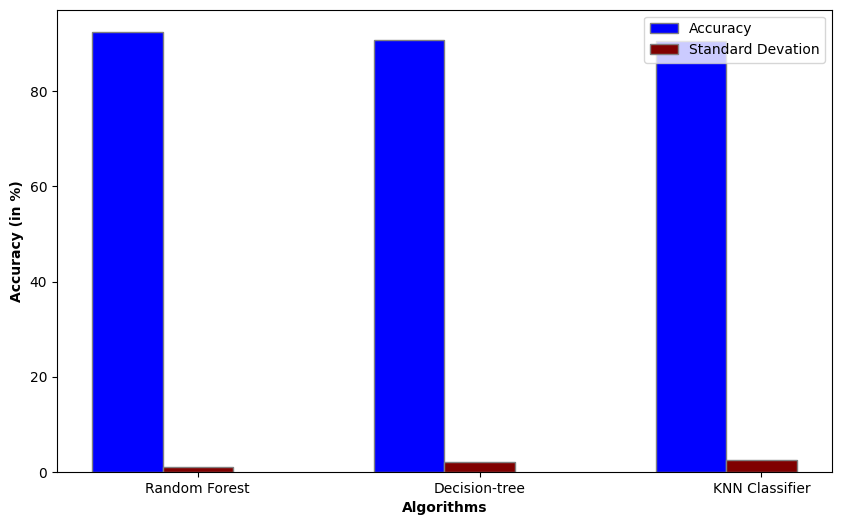

In [96]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Algorithms = ['Random Forest', 'Decision-tree', 'KNN Classifier']
Accuracy = [b1, b2, b3]
Standard_Deviation = [c1,c2,c3]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show()

In [97]:
# Saving the trained Random Forest model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(multi_target_forest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [98]:
import joblib

# export the model to a file
joblib.dump(model, 'multi_target_forest.joblib')

['multi_target_forest.joblib']

In [100]:
multi_target_forest.predict([[39,	77,	21,	22.997744,	4.603563,	159.689339]])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
      dtype=uint8)

In [101]:
y_test

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1916,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
305,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
